# Módulo 2 - Manipulação de Dados 

#### Libs

In [228]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

#### yFincance 

In [3]:
itub4 = yf.download('ITUB4.SA', start='2020-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


In [4]:
itub4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,37.279999,38.029999,36.990002,38.029999,31.228823,20666100
2020-01-03,37.500000,38.240002,37.450001,37.630001,30.900375,24891400
2020-01-06,37.549999,37.580002,36.910000,37.070000,30.440504,22294700
2020-01-07,37.070000,37.240002,36.209999,36.209999,29.734306,20000900
2020-01-08,36.450001,36.810001,35.619999,35.619999,29.249817,25980900
...,...,...,...,...,...,...
2020-12-22,31.170000,31.650000,31.150000,31.250000,26.311985,19659000
2020-12-23,31.320000,32.049999,31.270000,31.940001,26.892954,19959200
2020-12-28,32.220001,32.430000,32.009998,32.169998,27.086607,15444600


In [5]:
itub_total = itub4.copy()

In [6]:
itub_serires = itub4['Close']

In [7]:
itub4.index.day

Index([ 2,  3,  6,  7,  8,  9, 10, 13, 14, 15,
       ...
       15, 16, 17, 18, 21, 22, 23, 28, 29, 30],
      dtype='int32', name='Date', length=248)

In [8]:
itub4.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=248)

## 2.1 Datetime Lib

In [9]:
data = '04-05-2024'
data = dt.datetime.strptime(data, '%d-%m-%Y')
data

datetime.datetime(2024, 5, 4, 0, 0)

In [10]:
d = dt.datetime.now()
d

datetime.datetime(2024, 7, 25, 9, 49, 38, 291586)

In [11]:
t = dt.datetime.strftime(d, '%A')

In [12]:
dt.datetime.strftime(d, '%B')

'July'

In [13]:
dt.datetime.strftime(d, '%C')

'20'

### 2.12 TimeDelta

In [14]:
d_m_200 = dt.datetime.now() - dt.timedelta(days=200)

In [15]:
dt.datetime.strftime(d_m_200, '%Y-%m-%d')

'2024-01-07'

### 2.13 Usando o Pandas

In [16]:
data = pd.to_datetime(data, format='%d-%m-%Y')

In [17]:
data

Timestamp('2024-05-04 00:00:00')

In [18]:
pd.date_range(data, periods=5, freq='d')

DatetimeIndex(['2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07',
               '2024-05-08'],
              dtype='datetime64[ns]', freq='D')

### 2.14 Variáveis AUX

In [19]:
itub4 = itub4.head()

In [20]:
itub4.index = itub4.index.tz_localize('UTC').tz_convert('America/Sao_Paulo')

In [21]:
itub4['Time'] = itub4.index

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_14744\4153394085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4.index


In [22]:
itub4['Time'] = itub4['Time'].dt.time

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_14744\1433894871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4['Time'].dt.time


In [23]:
itub4['DayofYear'] = itub4['Time'].index.dayofyear

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_14744\4289030336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['DayofYear'] = itub4['Time'].index.dayofyear


In [24]:
itub4

,Open,High,Low,Close,Adj Close,Volume,Time,DayofYear
Date,,,,,,,,
2020-01-01 21:00:00-03:00,37.279999,38.029999,36.990002,38.029999,31.228823,20666100,21:00:00,1
2020-01-02 21:00:00-03:00,37.500000,38.240002,37.450001,37.630001,30.900375,24891400,21:00:00,2
2020-01-05 21:00:00-03:00,37.549999,37.580002,36.910000,37.070000,30.440504,22294700,21:00:00,5
2020-01-06 21:00:00-03:00,37.070000,37.240002,36.209999,36.209999,29.734306,20000900,21:00:00,6
2020-01-07 21:00:00-03:00,36.450001,36.810001,35.619999,35.619999,29.249817,25980900,21:00:00,7


##### Método resample

In [25]:
itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})
itub_total

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_14744\1504312676.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})


,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-31,37.279999,38.240002,32.540001,32.820000,26.950573
2020-02-29,33.000000,35.480000,30.570000,32.000000,26.668234
2020-03-31,31.930000,32.290001,20.000000,23.090000,19.251818
2020-04-30,22.219999,25.150000,20.010000,22.770000,18.997351
2020-05-31,21.950001,24.420000,20.730000,23.040001,19.235296
2020-06-30,22.830000,28.700001,22.700001,25.450001,21.261162
2020-07-31,25.600000,28.490000,25.540001,26.889999,22.477394
2020-08-31,27.100000,27.709999,23.510000,23.549999,19.739725
2020-09-30,23.870001,25.500000,22.299999,22.500000,18.871635


<Axes: xlabel='Date'>

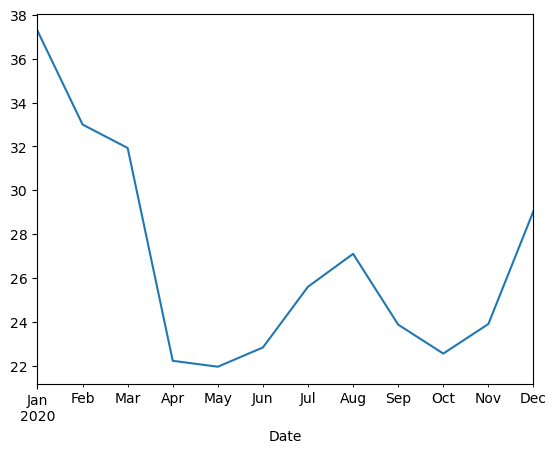

In [26]:
itub_total.Open.plot()

## 2.2 Multi Index

In [27]:
ibov = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]
ibov = [i + '.SA' for i in ibov]

In [28]:
df_ibov = yf.download(ibov, start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%%**********************]  91 of 91 completed

3 Failed downloads:
['BRML3.SA', 'ENBR3.SA', 'VIIA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [29]:
df_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           names=['Price', 'Ticker'], length=546)

In [30]:
set(df_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

<Axes: xlabel='Date'>

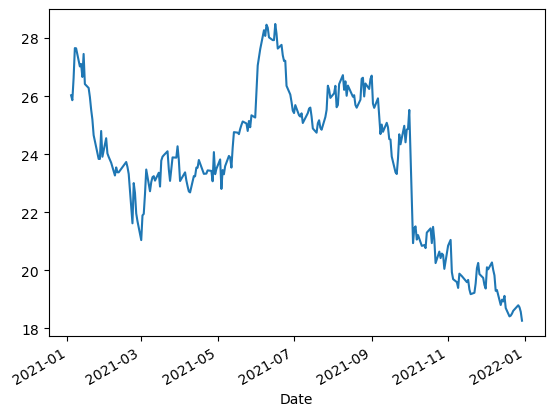

In [31]:
df_ibov[('Adj Close', 'ITUB4.SA')].plot()

## 2.3 Wide to Long

In [32]:
df_ibov

Price       Adj Close                                                         \
Ticker       ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  13.386031  41.159180  73.296127  63.056492        NaN  37.730000   
2021-01-05  13.671393  41.178944  71.658234  62.092094        NaN  38.200001   
2021-01-06  13.948107  38.935696  66.978508  58.419987        NaN  36.669998   
2021-01-07  13.878928  38.243946  65.623344  58.345798        NaN  36.049999   
2021-01-08  14.294000  40.220375  70.195816  59.440010        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.037923  36.350895  29.959963  69.586945  13.893169  26.459999   
2021-12-27  14.019868  36.460327  31.100647  70.281227  13.449455  25.670000   
2021-12-28  14.010840  36.559811  30.252447  70.459488  12.917000  25.750000   
2021-12-29  13.947647  36.161884  30.242695  69.783974  12.660631  23.860001   
2021-12-30  13.920564  36.828415  30.788664  72.026291  12.778955  24.360001   

Price                                                   ...    Volume  \
Ticker       B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  17.423172  14.515561  15.783038  17.821550  ...   3897800   
2021-01-05  17.457460  14.364958  15.707580  17.712893  ...   8506600   
2021-01-06  17.171740  14.693192  16.102446  18.299952  ...   9998400   
2021-01-07  17.651747  15.276283  16.497307  18.785788  ...  11072300   
2021-01-08  17.911751  15.365101  16.370152  18.623842  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.291168  12.156208  12.526314  14.909586  ...   2893300   
2021-12-27  10.227863  12.181173  12.657360  15.080072  ...   7282600   
2021-12-28  10.092217  12.110447  12.649651  15.025826  ...   3367300   
2021-12-29  10.019871  12.048043  12.557146  14.956081  ...   2589100   
2021-12-30  10.074130  12.002280  12.480061  14.886340  ...   7149400   

Price                                                                          \
Ticker     TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5443040  11878657  20687900  37865500   3953500      NaN  2791400   
2021-01-05  4441586  11782070  18302900  34300300  12993100      NaN  2899200   
2021-01-06  5526344  14248832  23592900  53722500  10884000      NaN  5790100   
2021-01-07  3330663  12239176  22298600  74541400   6954300      NaN  5213500   
2021-01-08  8448005   9657378  23237000  58562700   8434100      NaN  2916600   
...             ...       ...       ...       ...       ...      ...      ...   
2021-12-23  2731000   2238400  10681800  13121200   3932100      NaN  1382200   
2021-12-27  3040900   5340800  10504500  11371400   4196700      NaN  1492300   
2021-12-28  3269600   3777100  13201600  18923700   3743000      NaN  1060000   
2021-12-29  3205000   3591300  10525500  12113500   3630700      NaN   930200   
2021-12-30  4400600   8871300  12815100  26568500  13547600      NaN  2392600   

Price                          
Ticker      WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

In [33]:
df_ibov_long = df_ibov.melt(ignore_index=False)

In [34]:
df_ibov_long

,Price,Ticker,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.338603e+01
2021-01-05,Adj Close,ABEV3.SA,1.367139e+01
2021-01-06,Adj Close,ABEV3.SA,1.394811e+01
2021-01-07,Adj Close,ABEV3.SA,1.387893e+01
2021-01-08,Adj Close,ABEV3.SA,1.429400e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [35]:
df_ibov_long.columns = ['Parâmetro', 'Ativo', 'Valor']

In [36]:
df_ibov_long[(df_ibov_long['Parâmetro'] == 'Close') & (df_ibov_long['Ativo'] == 'ABEV3.SA')]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001
...,...,...,...
2021-12-23,Close,ABEV3.SA,15.550000
2021-12-27,Close,ABEV3.SA,15.530000
2021-12-28,Close,ABEV3.SA,15.520000


In [37]:
df_ibov_longo_b3 = df_ibov_long[df_ibov_long['Ativo'] == 'B3SA3.SA']

In [38]:
# Transformar o df em wide 

df_ibov_long.pivot(columns=['Parâmetro', 'Ativo'])

Valor                                                         \
Parâmetro   Adj Close                                                          
Ativo        ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  13.386031  41.159180  73.296127  63.056492        NaN  37.730000   
2021-01-05  13.671393  41.178944  71.658234  62.092094        NaN  38.200001   
2021-01-06  13.948107  38.935696  66.978508  58.419987        NaN  36.669998   
2021-01-07  13.878928  38.243946  65.623344  58.345798        NaN  36.049999   
2021-01-08  14.294000  40.220375  70.195816  59.440010        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.037923  36.350895  29.959963  69.586945  13.893169  26.459999   
2021-12-27  14.019868  36.460327  31.100647  70.281227  13.449455  25.670000   
2021-12-28  14.010840  36.559811  30.252447  70.459488  12.917000  25.750000   
2021-12-29  13.947647  36.161884  30.242695  69.783974  12.660631  23.860001   
2021-12-30  13.920564  36.828415  30.788664  72.026291  12.778955  24.360001   

                                                        ...              \
Parâmetro                                               ...      Volume   
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  17.423172  14.515561  15.783038  17.821550  ...   3897800.0   
2021-01-05  17.457460  14.364958  15.707580  17.712893  ...   8506600.0   
2021-01-06  17.171740  14.693192  16.102446  18.299952  ...   9998400.0   
2021-01-07  17.651747  15.276283  16.497307  18.785788  ...  11072300.0   
2021-01-08  17.911751  15.365101  16.370152  18.623842  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  10.291168  12.156208  12.526314  14.909586  ...   2893300.0   
2021-12-27  10.227863  12.181173  12.657360  15.080072  ...   7282600.0   
2021-12-28  10.092217  12.110447  12.649651  15.025826  ...   3367300.0   
2021-12-29  10.019871  12.048043  12.557146  14.956081  ...   2589100.0   
2021-12-30  10.074130  12.002280  12.480061  14.886340  ...   7149400.0   

                                                                       \
Parâmetro                                                               
Ativo        TOTS3.SA    UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                    
2021-01-04  5443040.0  11878657.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4441586.0  11782070.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5526344.0  14248832.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3330663.0  12239176.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8448005.0   9657378.0  23237000.0  58562700.0   8434100.0   
...               ...         ...         ...         ...         ...   
2021-12-23  2731000.0   2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0   5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0   3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0   3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0   8871300.0  12815100.0  26568500.0  13547600.0   

                                                       
Parâmetro                                              
Ativo      VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                   
2021-01-04      NaN  2791400.0   7219800.0  2640400.0  
2021-01-05      NaN  2899200.0  16633600.0  3703500.0  
2021-01-06      NaN  5790100.0  21507400.0  5004000.0  
2021-01-07      NaN  5213500.0  15129600.0  6138600.0  
2021-01-08      NaN  2916600.0  17381000.0  2685800.0  
...             ...        ...         ...        ...  
2021-12-23      NaN  1382200.0   

In [39]:
df_ibov_longo_b3.pivot(columns='Parâmetro', values= 'Valor')

Parâmetro,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,17.423172,20.326666,20.863333,20.206667,20.713333,25275300.0
2021-01-05,17.457460,20.366667,20.646666,19.886665,20.216665,29802900.0
2021-01-06,17.171740,20.033333,20.416666,19.676666,20.370001,51422400.0
2021-01-07,17.651747,20.593332,20.680000,19.913334,19.933332,27802200.0
2021-01-08,17.911751,20.896666,21.280001,20.496666,20.656666,41870100.0
...,...,...,...,...,...,...
2021-12-23,10.291168,11.380000,11.530000,11.300000,11.510000,38242300.0
2021-12-27,10.227863,11.310000,11.550000,11.190000,11.500000,26053300.0
2021-12-28,10.092217,11.160000,11.330000,11.100000,11.330000,15521100.0


## 2.4 Filtros

In [40]:
df_petr = df_ibov_long[(df_ibov_long['Parâmetro'] == 'Volume') & (df_ibov_long['Ativo'] == 'PETR4.SA')]

In [41]:
df_petr.Valor.mean()

79133021.86234818

In [42]:
df_petr[df_petr.Valor > df_petr.Valor.mean()]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-05,Volume,PETR4.SA,95181100.0
2021-01-06,Volume,PETR4.SA,96562500.0
2021-01-13,Volume,PETR4.SA,93826600.0
2021-01-15,Volume,PETR4.SA,80673300.0
2021-02-02,Volume,PETR4.SA,91663000.0
...,...,...,...
2021-12-02,Volume,PETR4.SA,191410300.0
2021-12-03,Volume,PETR4.SA,105133000.0
2021-12-07,Volume,PETR4.SA,98989300.0


In [43]:
df_ibov_long[(df_ibov_long.Parâmetro == 'Volume') & ((df_ibov_long.Ativo == 'ABEV3.SA') | (df_ibov_long.Ativo == 'PETR4.SA'))]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.0
2021-01-05,Volume,ABEV3.SA,37105800.0
2021-01-06,Volume,ABEV3.SA,28371600.0
2021-01-07,Volume,ABEV3.SA,32540100.0
2021-01-08,Volume,ABEV3.SA,30188800.0
...,...,...,...
2021-12-23,Volume,PETR4.SA,28713600.0
2021-12-27,Volume,PETR4.SA,44227900.0
2021-12-28,Volume,PETR4.SA,30688100.0


In [44]:
lista_ativos = ['ABEV3.SA', 'PETR4.SA', 'ITUB4.SA', 'B3SA3.SA']

In [45]:
df_ibov_long[df_ibov_long.Ativo.isin(lista_ativos)]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.338603e+01
2021-01-05,Adj Close,ABEV3.SA,1.367139e+01
2021-01-06,Adj Close,ABEV3.SA,1.394811e+01
2021-01-07,Adj Close,ABEV3.SA,1.387893e+01
2021-01-08,Adj Close,ABEV3.SA,1.429400e+01
...,...,...,...
2021-12-23,Volume,PETR4.SA,2.871360e+07
2021-12-27,Volume,PETR4.SA,4.422790e+07
2021-12-28,Volume,PETR4.SA,3.068810e+07


## 2.5 Formatação de Df

In [46]:
petr = yf.download('PETR4.SA', start='2000-01-03', end='2022-12-19')

[*********************100%%**********************]  1 of 1 completed


In [47]:
petr.index = pd.to_datetime(petr.index)

In [48]:
petr = petr[petr.index >= '2022-12']

In [49]:
petr['Resultado'] = (petr['Close'] - petr['Open']) / petr['Open'] * 100

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_14744\1283589058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr['Resultado'] = (petr['Close'] - petr['Open']) / petr['Open'] * 100


In [50]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,
2022-12-01,26.580000,26.790001,25.559999,25.590000,17.905502,71259400,-3.724604
2022-12-02,25.690001,26.450001,25.309999,25.910000,18.129410,66301000,0.856362
2022-12-05,26.000000,26.580000,25.549999,25.620001,17.926495,56065400,-1.461535
2022-12-06,25.820000,26.389999,25.420000,25.639999,17.940491,74991200,-0.697135
2022-12-07,25.340000,26.070000,25.270000,25.350000,17.737576,57008400,0.039464


In [51]:
petr.insert(1, 'Ativo', 'PETR4')

In [52]:
petr.head()

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01,26.580000,PETR4,26.790001,25.559999,25.590000,17.905502,71259400,-3.724604
2022-12-02,25.690001,PETR4,26.450001,25.309999,25.910000,18.129410,66301000,0.856362
2022-12-05,26.000000,PETR4,26.580000,25.549999,25.620001,17.926495,56065400,-1.461535
2022-12-06,25.820000,PETR4,26.389999,25.420000,25.639999,17.940491,74991200,-0.697135
2022-12-07,25.340000,PETR4,26.070000,25.270000,25.350000,17.737576,57008400,0.039464


### 2.5.1 Apply

In [53]:
#Excluir primeira coluna
petr.iloc[:,1:] = petr.iloc[:,1:].apply(lambda x: round(x, 2))



In [54]:
petr

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01,26.580000,PETR4,26.79,25.56,25.59,17.91,71259400,-3.72
2022-12-02,25.690001,PETR4,26.45,25.31,25.91,18.13,66301000,0.86
2022-12-05,26.000000,PETR4,26.58,25.55,25.62,17.93,56065400,-1.46
2022-12-06,25.820000,PETR4,26.39,25.42,25.64,17.94,74991200,-0.70
2022-12-07,25.340000,PETR4,26.07,25.27,25.35,17.74,57008400,0.04
2022-12-08,25.549999,PETR4,25.79,24.64,24.78,17.34,55567700,-3.01
2022-12-09,24.990000,PETR4,25.05,24.49,24.71,17.29,61586200,-1.12
2022-12-12,24.580000,PETR4,24.66,23.13,23.91,16.73,111293100,-2.73
2022-12-13,24.100000,PETR4,24.20,23.31,23.32,16.32,102533100,-3.24


### 2.5.2 Set Option

In [55]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [56]:
petr

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01,26.580,PETR4,26.790,25.560,25.590,17.910,71259400,-3.720
2022-12-02,25.690,PETR4,26.450,25.310,25.910,18.130,66301000,0.860
2022-12-05,26.000,PETR4,26.580,25.550,25.620,17.930,56065400,-1.460
2022-12-06,25.820,PETR4,26.390,25.420,25.640,17.940,74991200,-0.700
2022-12-07,25.340,PETR4,26.070,25.270,25.350,17.740,57008400,0.040
2022-12-08,25.550,PETR4,25.790,24.640,24.780,17.340,55567700,-3.010
2022-12-09,24.990,PETR4,25.050,24.490,24.710,17.290,61586200,-1.120
2022-12-12,24.580,PETR4,24.660,23.130,23.910,16.730,111293100,-2.730
2022-12-13,24.100,PETR4,24.200,23.310,23.320,16.320,102533100,-3.240


### 2.5.3 Style

In [57]:
petr.style.format('{:.1f}', subset=['Adj Close', 'Resultado'])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.580000,PETR4,26.790000,25.560000,25.590000,17.9,71259400,-3.7
2022-12-02 00:00:00,25.690001,PETR4,26.450000,25.310000,25.910000,18.1,66301000,0.9
2022-12-05 00:00:00,26.000000,PETR4,26.580000,25.550000,25.620000,17.9,56065400,-1.5
2022-12-06 00:00:00,25.820000,PETR4,26.390000,25.420000,25.640000,17.9,74991200,-0.7
2022-12-07 00:00:00,25.340000,PETR4,26.070000,25.270000,25.350000,17.7,57008400,0.0
2022-12-08 00:00:00,25.549999,PETR4,25.790000,24.640000,24.780000,17.3,55567700,-3.0
2022-12-09 00:00:00,24.990000,PETR4,25.050000,24.490000,24.710000,17.3,61586200,-1.1
2022-12-12 00:00:00,24.580000,PETR4,24.660000,23.130000,23.910000,16.7,111293100,-2.7
2022-12-13 00:00:00,24.100000,PETR4,24.200000,23.310000,23.320000,16.3,102533100,-3.2


In [58]:
[c for c in petr if petr[c].dtype == 'float64']

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Resultado']

In [59]:
petr.style.format('{:.1f}', subset=[c for c in petr if petr[c].dtype == 'float64']).highlight_max(color = 'green').highlight_min(color = 'red')

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.6,PETR4,26.8,25.6,25.6,17.9,71259400,-3.7
2022-12-02 00:00:00,25.7,PETR4,26.4,25.3,25.9,18.1,66301000,0.9
2022-12-05 00:00:00,26.0,PETR4,26.6,25.6,25.6,17.9,56065400,-1.5
2022-12-06 00:00:00,25.8,PETR4,26.4,25.4,25.6,17.9,74991200,-0.7
2022-12-07 00:00:00,25.3,PETR4,26.1,25.3,25.4,17.7,57008400,0.0
2022-12-08 00:00:00,25.5,PETR4,25.8,24.6,24.8,17.3,55567700,-3.0
2022-12-09 00:00:00,25.0,PETR4,25.1,24.5,24.7,17.3,61586200,-1.1
2022-12-12 00:00:00,24.6,PETR4,24.7,23.1,23.9,16.7,111293100,-2.7
2022-12-13 00:00:00,24.1,PETR4,24.2,23.3,23.3,16.3,102533100,-3.2


In [60]:
float_columns = []
for i in range(0, len(petr.columns)):
    if type(petr.iloc[1, i]) == np.float64:
        float_columns.append(i)
float_columns

[0, 2, 3, 4, 5, 7]

In [61]:
petr.sort_values(by='Resultado', ascending=False).style.format('{:.4f}', subset=petr.columns[float_columns]).background_gradient(subset=['Resultado'])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-15 00:00:00,21.0000,PETR4,22.3700,20.8300,22.0400,15.4200,132385600,4.9500
2022-12-02 00:00:00,25.6900,PETR4,26.4500,25.3100,25.9100,18.1300,66301000,0.8600
2022-12-16 00:00:00,21.9600,PETR4,22.1100,21.5100,22.0500,15.4300,90767300,0.4100
2022-12-07 00:00:00,25.3400,PETR4,26.0700,25.2700,25.3500,17.7400,57008400,0.0400
2022-12-06 00:00:00,25.8200,PETR4,26.3900,25.4200,25.6400,17.9400,74991200,-0.7000
2022-12-09 00:00:00,24.9900,PETR4,25.0500,24.4900,24.7100,17.2900,61586200,-1.1200
2022-12-05 00:00:00,26.0000,PETR4,26.5800,25.5500,25.6200,17.9300,56065400,-1.4600
2022-12-12 00:00:00,24.5800,PETR4,24.6600,23.1300,23.9100,16.7300,111293100,-2.7300
2022-12-08 00:00:00,25.5500,PETR4,25.7900,24.6400,24.7800,17.3400,55567700,-3.0100


In [62]:
petr.style.format("{:.2f}", subset=petr.columns[float_columns]).\
      map(lambda x: "font-weight: bold; color: black; background-color : #d40202"
      if x < 0 else "font-weight: bold; color: green; background-color : #4eb55c", subset=["Resultado"])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.58,PETR4,26.79,25.56,25.59,17.91,71259400,-3.72
2022-12-02 00:00:00,25.69,PETR4,26.45,25.31,25.91,18.13,66301000,0.86
2022-12-05 00:00:00,26.00,PETR4,26.58,25.55,25.62,17.93,56065400,-1.46
2022-12-06 00:00:00,25.82,PETR4,26.39,25.42,25.64,17.94,74991200,-0.70
2022-12-07 00:00:00,25.34,PETR4,26.07,25.27,25.35,17.74,57008400,0.04
2022-12-08 00:00:00,25.55,PETR4,25.79,24.64,24.78,17.34,55567700,-3.01
2022-12-09 00:00:00,24.99,PETR4,25.05,24.49,24.71,17.29,61586200,-1.12
2022-12-12 00:00:00,24.58,PETR4,24.66,23.13,23.91,16.73,111293100,-2.73
2022-12-13 00:00:00,24.10,PETR4,24.20,23.31,23.32,16.32,102533100,-3.24


In [63]:
petr.style.format("{:.2f}", subset=petr.columns[float_columns]).\
      map(lambda x: "font-weight: bold; color: white; background-color : #d40202"
              if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado"]).\
      set_table_styles([{"selector": "td", "props": "text-align: center"},
                        {"selector": "th", "props": "text-align: center; font-weight: bold; background-color: lightblue; color: black; font-size: 19pt"},
                        {"selector": "th.index_name", "props": "text-align: center; font-weight: bold; background-color: orange; color: black; font-size: 20pt"},
                        {"selector": "th.row_heading", "props": "text-align: center; font-weight: bold; background-color: yellow; color: black; font-size: 11pt"},
                        {"selector": "td:hover", "props": "text-align: center; font-weight: bold; background-color: pink; color: black; font-size: 15pt"}])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.58,PETR4,26.79,25.56,25.59,17.91,71259400,-3.72
2022-12-02 00:00:00,25.69,PETR4,26.45,25.31,25.91,18.13,66301000,0.86
2022-12-05 00:00:00,26.00,PETR4,26.58,25.55,25.62,17.93,56065400,-1.46
2022-12-06 00:00:00,25.82,PETR4,26.39,25.42,25.64,17.94,74991200,-0.70
2022-12-07 00:00:00,25.34,PETR4,26.07,25.27,25.35,17.74,57008400,0.04
2022-12-08 00:00:00,25.55,PETR4,25.79,24.64,24.78,17.34,55567700,-3.01
2022-12-09 00:00:00,24.99,PETR4,25.05,24.49,24.71,17.29,61586200,-1.12
2022-12-12 00:00:00,24.58,PETR4,24.66,23.13,23.91,16.73,111293100,-2.73
2022-12-13 00:00:00,24.10,PETR4,24.20,23.31,23.32,16.32,102533100,-3.24


## 2.6 Consolidação de Df

In [64]:
petr4_ohlc = yf.download('PETR4.SA', period='max')

[*********************100%%**********************]  1 of 1 completed


In [65]:
petr4_div = yf.Ticker('PETR4.SA').dividends

In [66]:
petr4_div.index = pd.to_datetime(petr4_div.index.date)

In [67]:
petr4_div = petr4_div.rename_axis('Date')

In [68]:
ibov_yf = yf.download('^BVSP', start='2015-01-01', auto_adjust=True)
ibov_yf = ibov_yf.rename(columns= str.lower)

[*********************100%%**********************]  1 of 1 completed


In [220]:
#Ler uma planilha expecífica de um arquivo excel
#ibov_tv foi obtido usando a lib 'tvDatafeed'

ibov_tv = pd.read_excel('arquivos\dados_concatenar_dfs.xlsx', sheet_name='ibov_tv', index_col='Date', parse_dates= True)

### 2.6.1 Verificar se os dfs são iguais

In [70]:
pd.DataFrame.equals(ibov_yf, ibov_tv)

False

In [71]:
pd.DataFrame.equals(ibov_yf[['open', 'close']], ibov_tv[['open', 'close']])

False

In [72]:
set(ibov_tv).symmetric_difference(ibov_yf)

{'symbol'}

In [73]:
ibov_yf[~ibov_yf.index.isin(ibov_tv.index)]

,open,high,low,close,volume
Date,,,,,
2017-12-29,76077.000,76437.000,76077.000,76402.000,0
2023-04-26,103220.000,103668.000,102233.000,102312.000,10115500
2023-04-27,102310.000,103177.000,101975.000,102923.000,11302800
2023-04-28,102923.000,104432.000,102449.000,104432.000,13080900
2023-05-02,104431.000,104447.000,101569.000,101927.000,12018000
...,...,...,...,...,...
2024-07-18,129450.000,129454.000,127523.000,127652.000,7591500
2024-07-19,127652.000,128360.000,127413.000,127616.000,7620400
2024-07-22,127616.000,128151.000,127456.000,127860.000,6098200


### 2.6.2 Merge e Concat


- **Merge**

Operação realizada para unir dois dataframes diferentes

- **Concat**

Empilha os dataframes pela coluna ```(axis = 1) ``` ou pela linha ```(axis = 0) ```

As duas operações são guiados pelos tipos de *Joins*, determinando como serão consolidados

<img src="https://estradawebgroup.com/ImagesUpload/sql-joins.jpg" alt="Alternative text"/>

**syntax:**
```Python
result = pd.merge(amazon_df, 
                apple_df['Open', 'Close', 'High'], 
                on = 'Date', sufixes = ('_amazon', '_apple'))
```

In [74]:
# Right Join

pd.merge(petr4_ohlc['Close'], petr4_div, how = 'right', on = 'Date').head()

,Close,Dividends
Date,,
2005-04-01,12.988,0.133
2005-07-01,13.524,0.251
2006-01-02,19.045,0.259
2006-04-04,21.645,0.133
2006-11-01,21.225,0.501


In [75]:
# Full (Outer) Join

pd.merge(ibov_tv['close'], ibov_yf['close'], how = 'outer', on = 'Date', indicator=True, suffixes=('_tv', '_yf'))

,close_tv,close_yf,_merge
Date,,,
2015-01-02,48512.219,48512.000,both
2015-01-05,47516.820,47517.000,both
2015-01-06,48000.922,48001.000,both
2015-01-07,49462.910,49463.000,both
2015-01-08,49943.301,49943.000,both
...,...,...,...
2024-07-18,NaN,127652.000,right_only
2024-07-19,NaN,127616.000,right_only
2024-07-22,NaN,127860.000,right_only


In [82]:
pd.merge(ibov_tv['close'], ibov_yf['close'], how = 'outer', left_index=True, right_index=True, indicator=True, suffixes=('_1', '_2'))

,close_1,close_2,_merge
Date,,,
2015-01-02,48512.219,48512.000,both
2015-01-05,47516.820,47517.000,both
2015-01-06,48000.922,48001.000,both
2015-01-07,49462.910,49463.000,both
2015-01-08,49943.301,49943.000,both
...,...,...,...
2024-07-18,NaN,127652.000,right_only
2024-07-19,NaN,127616.000,right_only
2024-07-22,NaN,127860.000,right_only


In [76]:
pd.concat([ibov_yf, ibov_yf], axis = 0)

,open,high,low,close,volume
Date,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100
2015-01-06,47517.000,48061.000,47338.000,48001.000,4559300
2015-01-07,48006.000,49882.000,48006.000,49463.000,4408800
2015-01-08,49463.000,50261.000,49017.000,49943.000,3621900
...,...,...,...,...,...
2024-07-18,129450.000,129454.000,127523.000,127652.000,7591500
2024-07-19,127652.000,128360.000,127413.000,127616.000,7620400
2024-07-22,127616.000,128151.000,127456.000,127860.000,6098200


### 2.6.2 Bining

- Variáveis Qualitativas que representam categorias de uma variável numérica

In [77]:
ibov_yf['Resultado'] = ibov_yf.close.pct_change()*100

In [78]:
results_bin = np.sign(ibov_yf['Resultado']).value_counts()

In [79]:
ibov_yf['Binary'] = np.where(ibov_yf['Resultado'] > 0, 'Positivo', 'Negativo')

In [84]:
ibov_yf['Faixa'] = np.where(ibov_yf['Resultado'] > 1, "maior_que_1", np.where(ibov_yf['Resultado'] >= 0, 'entre_0_e_1', 'menor_que_0'))

In [85]:
ibov_yf

,open,high,low,close,volume,Resultado,Binary,Faixa
Date,,,,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100,NaN,Negativo,menor_que_0
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100,-2.051,Negativo,menor_que_0
2015-01-06,47517.000,48061.000,47338.000,48001.000,4559300,1.019,Positivo,maior_que_1
2015-01-07,48006.000,49882.000,48006.000,49463.000,4408800,3.046,Positivo,maior_que_1
2015-01-08,49463.000,50261.000,49017.000,49943.000,3621900,0.970,Positivo,entre_0_e_1
...,...,...,...,...,...,...,...,...
2024-07-18,129450.000,129454.000,127523.000,127652.000,7591500,-1.389,Negativo,menor_que_0
2024-07-19,127652.000,128360.000,127413.000,127616.000,7620400,-0.028,Negativo,menor_que_0
2024-07-22,127616.000,128151.000,127456.000,127860.000,6098200,0.191,Positivo,entre_0_e_1


### 2.6.3 Função CrossTab

In [124]:
ibov_yf['Dia da semana'] = ibov_yf.index.strftime("%A")
ibov_yf

,open,high,low,close,volume,Resultado,Binary,Faixa,Dia da semana
Date,,,,,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100,NaN,Negativo,menor_que_0,Friday
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100,-2.051,Negativo,menor_que_0,Monday
2015-01-06,47517.000,48061.000,47338.000,48001.000,4559300,1.019,Positivo,maior_que_1,Tuesday
2015-01-07,48006.000,49882.000,48006.000,49463.000,4408800,3.046,Positivo,maior_que_1,Wednesday
2015-01-08,49463.000,50261.000,49017.000,49943.000,3621900,0.970,Positivo,entre_0_e_1,Thursday
...,...,...,...,...,...,...,...,...,...
2024-07-18,129450.000,129454.000,127523.000,127652.000,7591500,-1.389,Negativo,menor_que_0,Thursday
2024-07-19,127652.000,128360.000,127413.000,127616.000,7620400,-0.028,Negativo,menor_que_0,Friday
2024-07-22,127616.000,128151.000,127456.000,127860.000,6098200,0.191,Positivo,entre_0_e_1,Monday


In [136]:
cross = pd.crosstab(ibov_yf['Dia da semana'], ibov_yf['Faixa'])

In [137]:
cross['Total dias'] = cross.sum(axis = 1)

In [138]:
cross.loc['Total'] = cross.sum(axis=0)

In [139]:
cross['Pct Negstivos %'] = cross['menor_que_0']/cross['Total dias']*100

In [140]:
cross

Faixa,entre_0_e_1,maior_que_1,menor_que_0,Total dias,Pct Negstivos %
Dia da semana,,,,,
Friday,142,95,231,468,49.359
Monday,144,92,234,470,49.787
Thursday,145,103,225,473,47.569
Tuesday,136,113,226,475,47.579
Wednesday,136,126,222,484,45.868
Total,703,529,1138,2370,48.017


### 2.6.4 Pivot Table e Groupby

In [148]:
pd.pivot_table(ibov_yf, index = 'Dia da semana', columns = 'Binary', values = 'high', aggfunc = ['max', 'min'])

max                  min          
Binary          Negativo   Positivo  Negativo  Positivo
Dia da semana                                          
Friday        131661.000 133035.000 39494.000 38444.000
Monday        129307.000 132498.000 38633.000 40570.000
Thursday      134392.000 132277.000 40370.000 38079.000
Tuesday       134195.000 133645.000 38031.000 38857.000
Wednesday     132341.000 134195.000 38056.000 38766.000

In [171]:
ibov_yf['Ano'] = ibov_yf.index.year
ibov_yf['Mes'] = ibov_yf.index.month_name()

In [172]:
ibov_yf.head()

,open,high,low,close,volume,Resultado,Binary,Faixa,Dia da semana,Ano,Mes
Date,,,,,,,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100,NaN,Negativo,menor_que_0,Friday,2015,January
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100,-2.051,Negativo,menor_que_0,Monday,2015,January
2015-01-06,47517.000,48061.000,47338.000,48001.000,4559300,1.019,Positivo,maior_que_1,Tuesday,2015,January
2015-01-07,48006.000,49882.000,48006.000,49463.000,4408800,3.046,Positivo,maior_que_1,Wednesday,2015,January
2015-01-08,49463.000,50261.000,49017.000,49943.000,3621900,0.970,Positivo,entre_0_e_1,Thursday,2015,January


In [183]:
ibov_yf.groupby(['Mes', 'Ano'])[['high', 'low']].agg({'high': 'max', 'low': 'min'})

high        low
Mes       Ano                       
April     2015  56965.000  51186.000
          2016  54978.000  47874.000
          2017  66211.000  62826.000
          2018  87179.000  82762.000
          2019  97610.000  92338.000
...                   ...        ...
September 2019 106001.000  99406.000
          2020 103226.000  93408.000
          2021 119942.000 107520.000
          2022 114392.000 106244.000
          2023 119780.000 113366.000

[115 rows x 2 columns]

<Axes: xlabel='Ano'>

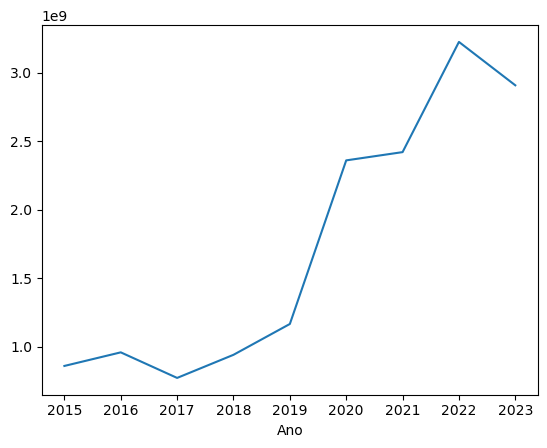

In [189]:
ibov_yf[ibov_yf.Ano != 2024].groupby('Ano')['volume'].sum().plot()

In [195]:
ibov_yf.groupby('Ano')['Resultado'].get_group(2022)

Date
2022-01-03   -0.859
2022-01-04   -0.393
2022-01-05   -2.423
2022-01-06    0.549
2022-01-07    1.140
              ...  
2022-12-23    2.219
2022-12-26   -0.875
2022-12-27   -0.360
2022-12-28    1.744
2022-12-29   -0.187
Name: Resultado, Length: 250, dtype: float64

In [214]:
def coef_var(x):
    return x.std()/x.mean()*100

ibov_yf.groupby('Ano')['high'].apply(coef_var)

Ano
2015    6.905
2016   13.294
2017    7.169
2018    5.956
2019    5.629
2020   13.108
2021    6.242
2022    5.116
2023    6.748
2024    2.344
Name: high, dtype: float64

In [215]:
ibov_yf.groupby('Ano')[['high', 'Binary']].agg({'high': coef_var, 'Binary':'max'})

,high,Binary
Ano,,
2015,6.905,Positivo
2016,13.294,Positivo
2017,7.169,Positivo
2018,5.956,Positivo
2019,5.629,Positivo
2020,13.108,Positivo
2021,6.242,Positivo
2022,5.116,Positivo
2023,6.748,Positivo


## 2.7 Finanças Quantitativas

In [236]:
petr4 = yf.download('PETR4.SA', start='2017-01-01', end='2022-02-10')

[*********************100%%**********************]  1 of 1 completed


### 2.7.1 Média Móvel